In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

# rdkit tools
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import DataStructs

from ete3 import NCBITaxa

In [2]:
df = pd.read_csv(
    "/Users/guillaumebelissent/Docs/EPFL/MA/ADA/BindingDB_All.tsv",
    sep="\t",
    nrows=100000,
)
df["Ki (nM)"] = (
    df["Ki (nM)"].astype(str).str.replace(">", "").str.replace("<", "").astype(float)
)

/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_37395/1228600971.py:1: DtypeWarning: Columns (8,9,10,11,15,17,21,43,45,46,47,48,50,51,52,53,54,55,57,58,59,62,63,64,65,66,67,69,70,71,72,74,75,76,77,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [18]:
for col in df.columns:
    print(f"'{col}',")

'BindingDB Reactant_set_id',
'Ligand SMILES',
'Ligand InChI',
'Ligand InChI Key',
'BindingDB MonomerID',
'BindingDB Ligand Name',
'Target Name',
'Target Source Organism According to Curator or DataSource',
'Ki (nM)',
'IC50 (nM)',
'Kd (nM)',
'EC50 (nM)',
'kon (M-1-s-1)',
'koff (s-1)',
'pH',
'Temp (C)',
'Curation/DataSource',
'Article DOI',
'BindingDB Entry DOI',
'PMID',
'PubChem AID',
'Patent Number',
'Authors',
'Institution',
'Link to Ligand in BindingDB',
'Link to Target in BindingDB',
'Link to Ligand-Target Pair in BindingDB',
'Ligand HET ID in PDB',
'PDB ID(s) for Ligand-Target Complex',
'PubChem CID',
'PubChem SID',
'ChEBI ID of Ligand',
'ChEMBL ID of Ligand',
'DrugBank ID of Ligand',
'IUPHAR_GRAC ID of Ligand',
'KEGG ID of Ligand',
'ZINC ID of Ligand',
'Number of Protein Chains in Target (>1 implies a multichain complex)',
'BindingDB Target Chain Sequence',
'PDB ID(s) of Target Chain',
'UniProt (SwissProt) Recommended Name of Target Chain',
'UniProt (SwissProt) Entry Name of Targe

In [19]:
chem = (
    df[
        [
            "BindingDB Reactant_set_id",
            "Ligand SMILES",
            "BindingDB MonomerID",
            "BindingDB Ligand Name",
            "Ki (nM)",
            "Target Source Organism According to Curator or DataSource",
        ]
    ]
    .dropna(axis=0)
    .sample(n=5000)
    .reset_index(drop=True)
)
chem["Ki (nM)"] = (
    chem["Ki (nM)"].astype(str).str.replace(">", "").str.replace("<", "").astype(float)
)
chem

,BindingDB Reactant_set_id,Ligand SMILES,BindingDB MonomerID,BindingDB Ligand Name,Ki (nM),Target Source Organism According to Curator or DataSource
0,18486,CCN[C@H]1CN(CCCOC)S(=O)(=O)c2sc(cc12)S(N)(=O)=O,10885,"(4R)-4-(ethylamino)-2-(3-methoxypropyl)-1,1-di...",3.00,Homo sapiens
1,22714,N[C@@H](C1CCCCC1)C(=O)N1[C@H](CC[C@H]1C#N)C#C,12632,"(2S,5R)-1-[(2S)-2-amino-2-cyclohexylacetyl]-5-...",96.00,Homo sapiens
2,13412,O[C@@H](CC(=O)NC1CCCCC1)[C@H](COCc1ccc(Br)cc1)...,7995,"(3S,4S)-5-[(4-bromophenyl)methoxy]-N-cyclohexy...",230.00,Plasmodium falciparum
3,35463,C[C@@H](CNc1ccc(OC(F)(F)F)cc1)NC(=O)[C@H](CC(C...,19720,"(2S)-4,4-dimethyl-2-(morpholin-4-ylcarbonylami...",461.00,Homo sapiens
4,33405,Oc1ccc(cc1Cl)C1(OC(=O)c2c1ccc1ccccc21)c1ccc(O)...,18760,"1,2-naphthalein derivative, 7::5,5-bis(3-chlor...",34000.00,Homo sapiens
...,...,...,...,...,...,...
4995,75842,CCCC(=O)N(Cc1ccco1)S(=O)(=O)c1cccc2cccnc12,40447,N-(2-furanylmethyl)-N-(8-quinolinylsulfonyl)bu...,44300.00,Homo sapiens
4996,47836,CCOC(=O)c1ncn-2c1CN(C)C(=O)c1cc(F)ccc-21,26263,Anexate::CHEMBL407::FLUMAZENIL::Ro15-1788::Rom...,0.19,Homo sapiens
4997,38239,CN1CCN(CC(=O)Nc2cc(nc(n2)-c2ccco2)-n2nc(C)cc2C...,21175,"CHEMBL252171::N-[6-(3,5-dimethyl-1H-pyrazol-1-...",2.00,Homo sapiens
4998,63600,OC(=O)\C=C\c1ccc(Cc2cccs2)cc1OCCc1ccc2ccccc2c1,35858,"acrylic acid derivative, 15",10000.00,Mus musculus


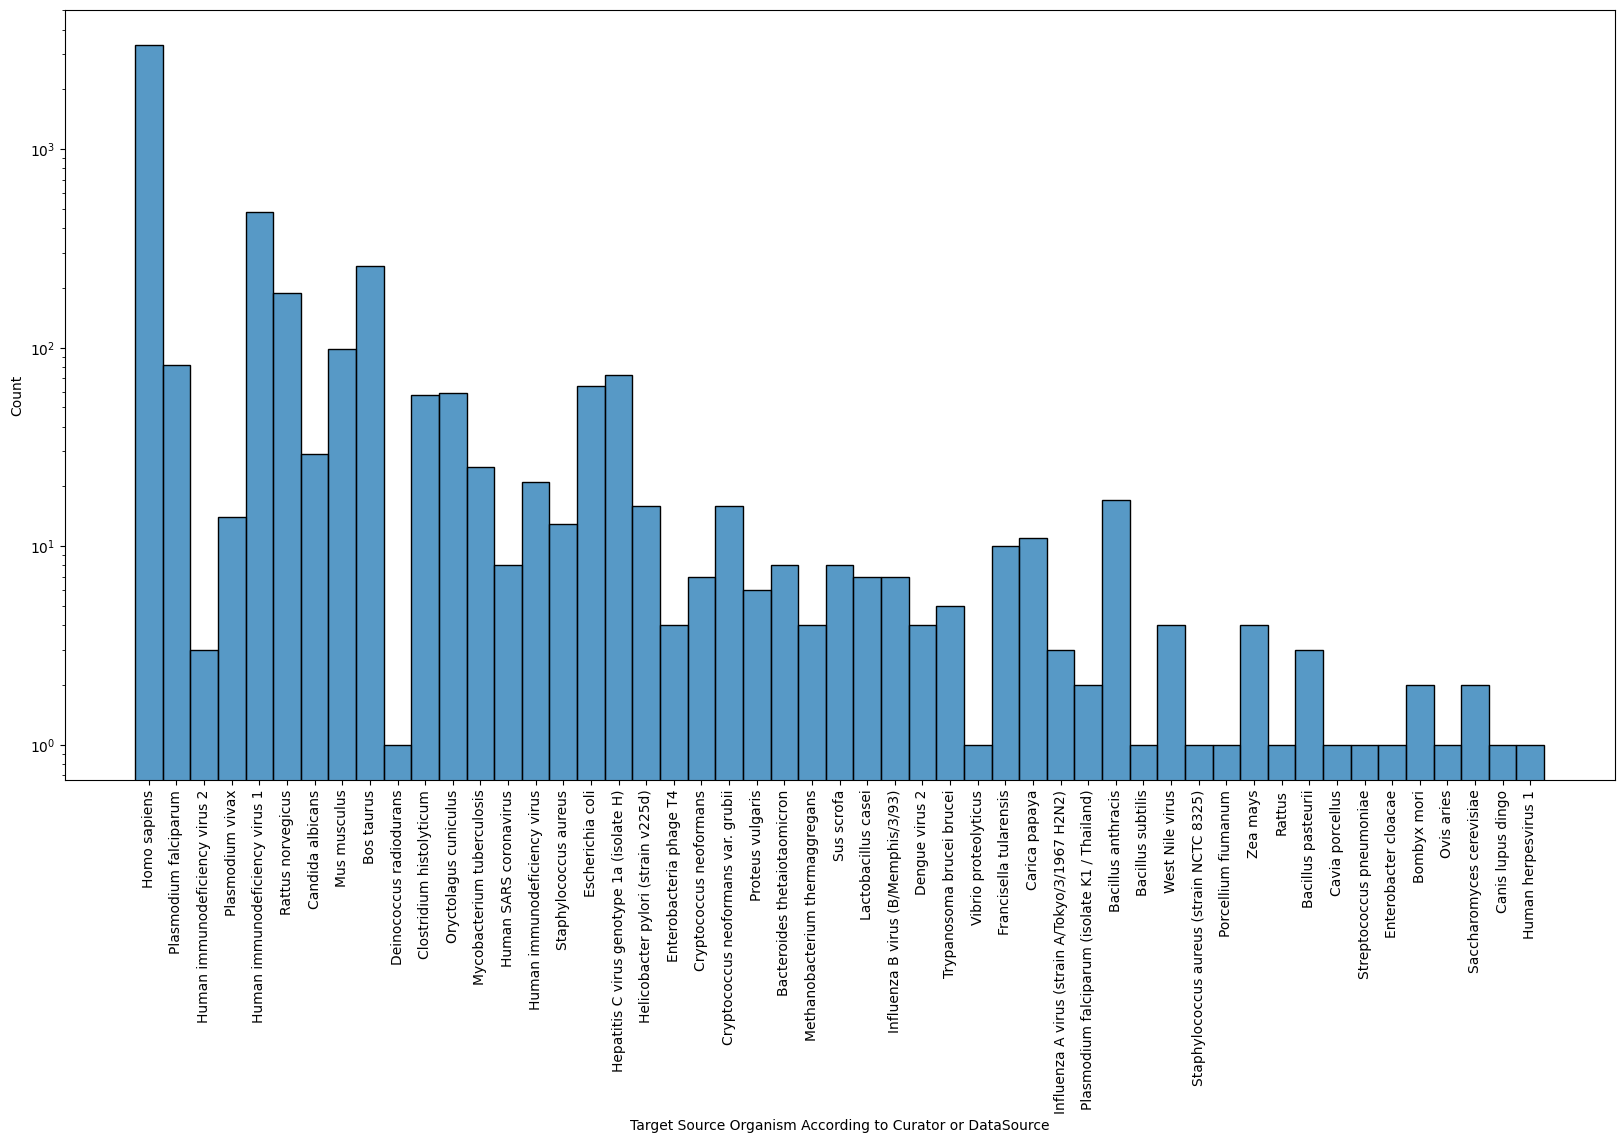

In [20]:
plt.figure(figsize=(20, 10))
sns.histplot(chem, x="Target Source Organism According to Curator or DataSource")
plt.xticks(rotation=90)
plt.yscale("log")

# Fingerprints

In [21]:
fpgen = AllChem.GetMorganGenerator(radius=3)
mols = [Chem.MolFromSmiles(sm) for sm in chem["Ligand SMILES"]]
fingerprints = [fpgen.GetFingerprint(mol) for mol in mols]

In [22]:
# Compute the Tanimoto similarity between all pairs
def tanimoto_similarity(fp1, fp2):
    return DataStructs.FingerprintSimilarity(fp1, fp2)


tanimoto_matrix = np.array(
    [[tanimoto_similarity(fp1, fp2) for fp2 in fingerprints] for fp1 in fingerprints]
)

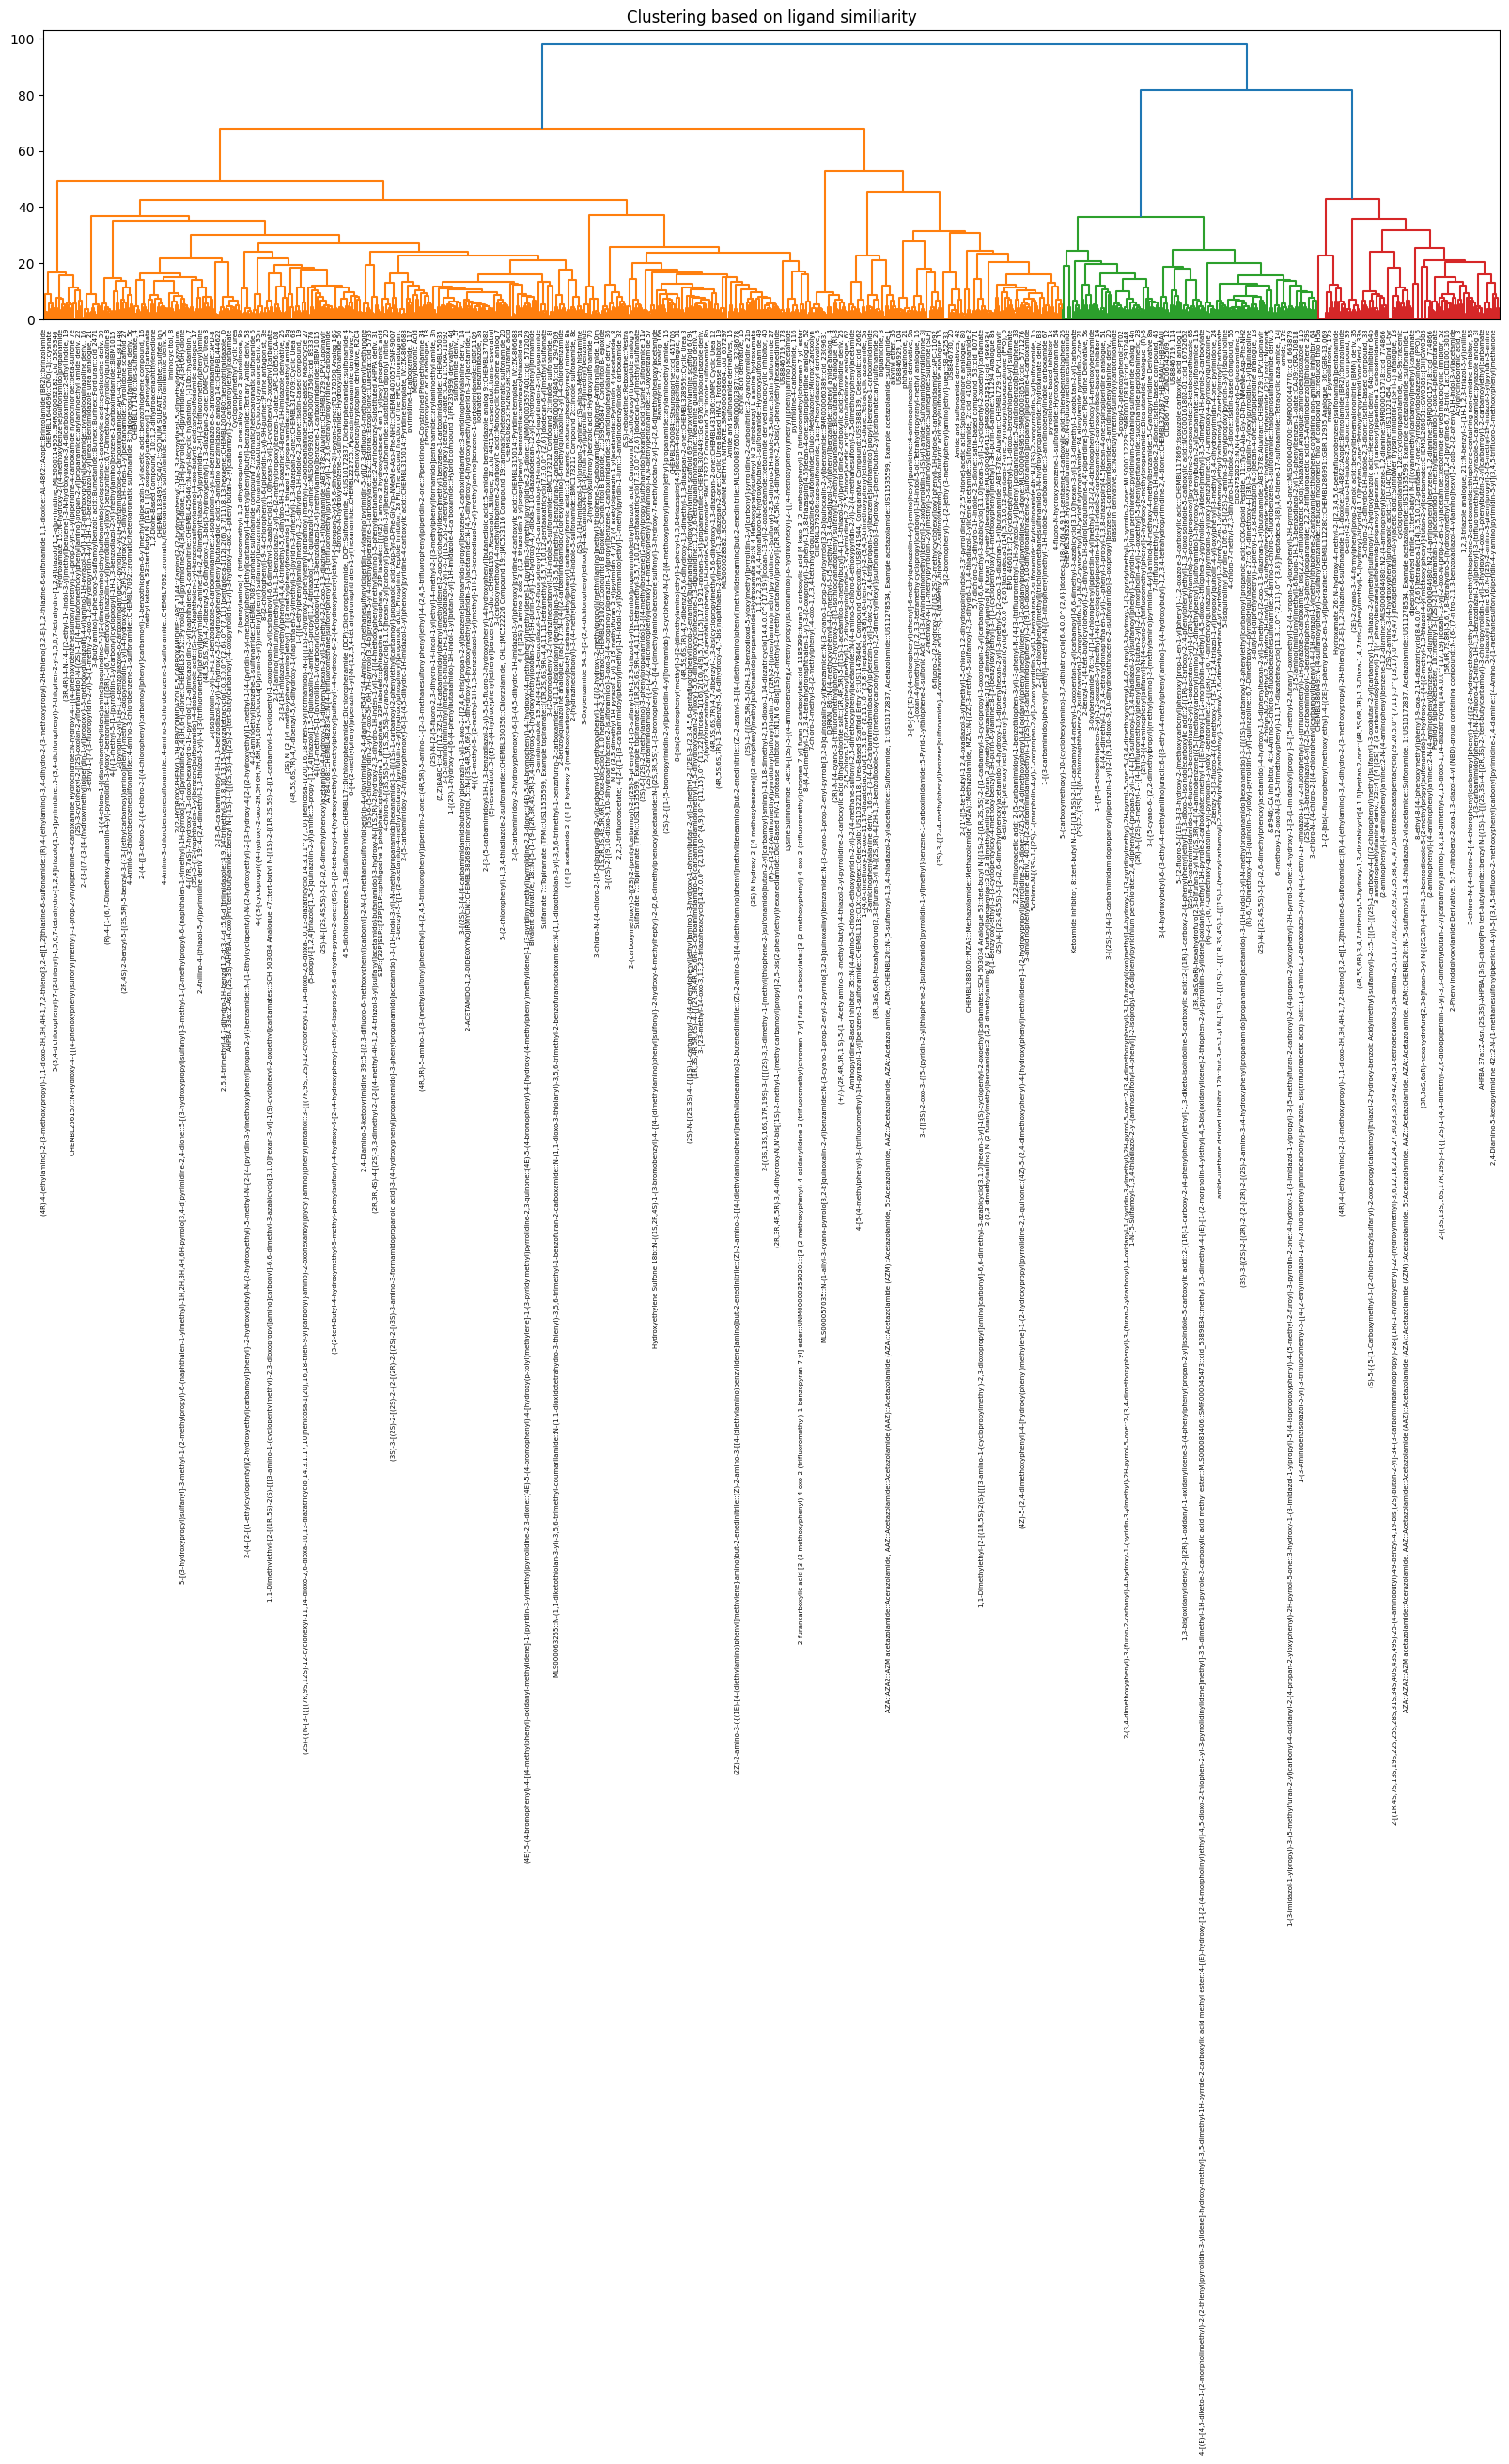

In [23]:
plt.figure(figsize=(20, 4))
Z = linkage(tanimoto_matrix, method="ward")
dendrogram(Z)
plt.title("Clustering based on ligand similiarity")
plt.gca().set_xticklabels(
    [
        str(tick) if i % 20 == 0 else ""
        for i, tick in enumerate(chem["BindingDB Ligand Name"])
    ]
)
plt.show()

In [24]:
# Apply PCA to the distance matrix
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(tanimoto_matrix)

chem = pd.concat([chem, pd.DataFrame(pca_coords, columns=["PC1", "PC2"])], axis=1)

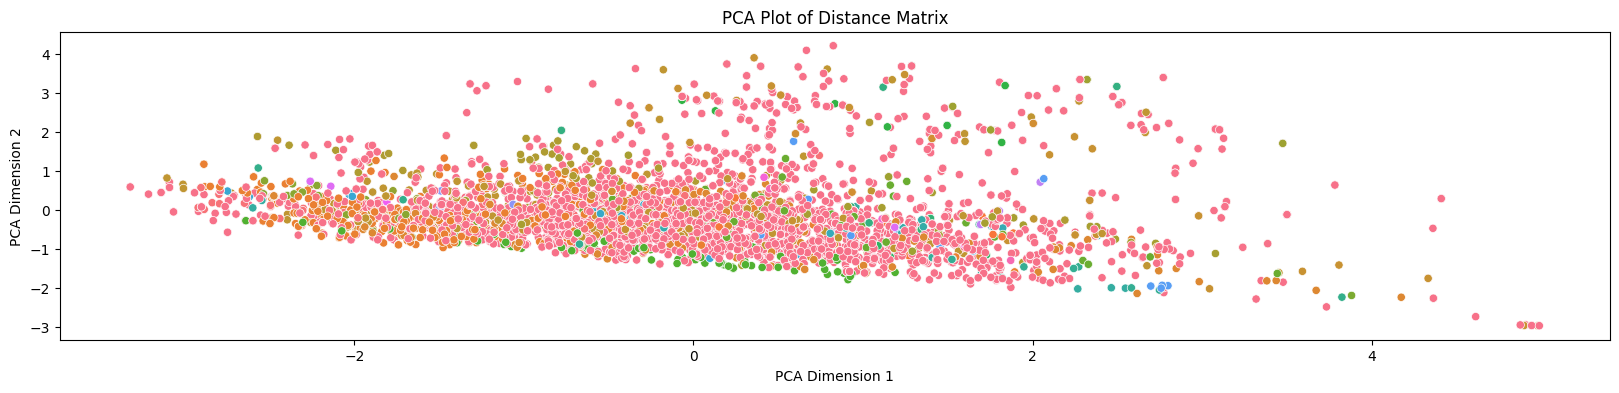

In [25]:
# Plot the PCA result
plt.figure(figsize=(20, 4))
sns.scatterplot(
    data=chem,
    x="PC1",
    y="PC2",
    hue="Target Source Organism According to Curator or DataSource",
)
plt.title("PCA Plot of Distance Matrix")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend().remove()
plt.show()

In [26]:
fpgen = AllChem.GetMorganGenerator(radius=3)
ecoli = df[df['Target Source Organism According to Curator or DataSource'] == 'Escherichia coli'][['BindingDB Reactant_set_id', 'Ligand SMILES','BindingDB MonomerID',
                                                                                                   'BindingDB Ligand Name','Target Name','Ki (nM)',
                                                                                                   'Target Source Organism According to Curator or DataSource']].dropna().reset_index(drop=True)
mols = [Chem.MolFromSmiles(sm) for sm in ecoli['Ligand SMILES']]
fingerprints = [fpgen.GetFingerprint(mol) for mol in mols]

get_fingerprint = lambda smiles: fpgen.GetFingerprint(Chem.MolFromSmiles(smiles))
ecoli["Ligand Fingerprint"] = ecoli["Ligand SMILES"].apply(get_fingerprint)

tanimoto_matrix = np.array(
    [
        [tanimoto_similarity(fp1, fp2) for fp2 in ecoli["Ligand Fingerprint"]]
        for fp1 in ecoli["Ligand Fingerprint"]
    ]
)

In [27]:
# Apply PCA to the distance matrix
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(tanimoto_matrix)

ecoli = pd.concat([ecoli, pd.DataFrame(pca_coords, columns=["PC1", "PC2"])], axis=1)

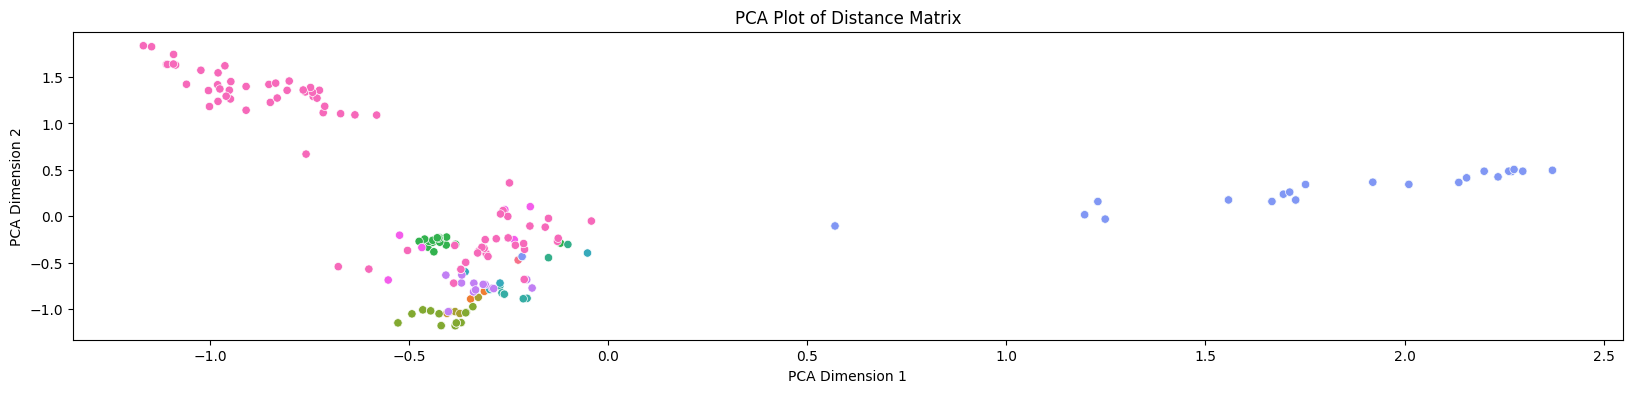

In [28]:
# Plot the PCA result
plt.figure(figsize=(20, 4))
sns.scatterplot(data=ecoli, x = 'PC1', y = 'PC2', hue = 'Target Name')
plt.title('PCA Plot of Distance Matrix')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend().remove()
plt.show()

# Scaffolds

In [29]:
# Generate scaffolds for each ligand
scaffolds = [MurckoScaffold.GetScaffoldForMol(smiles) for smiles in mols]
scaffolds_smiles = [Chem.MolToSmiles(scaffold) for scaffold in scaffolds]
print(
    f'Number of unique scaffolds:\t{np.unique(scaffolds_smiles).shape[0]}\nNumber of unique ligands:\t{np.unique(chem["Ligand SMILES"]).shape[0]}'
)
chem["Scaffold SMILES"] = scaffolds_smiles
chem = pd.merge(
    chem, chem.value_counts("Scaffold SMILES"), on="Scaffold SMILES"
).rename(columns={"count": "Scaffold Count"})

Number of unique scaffolds:	87
Number of unique ligands:	3745


ValueError: Length of values (202) does not match length of index (5000)

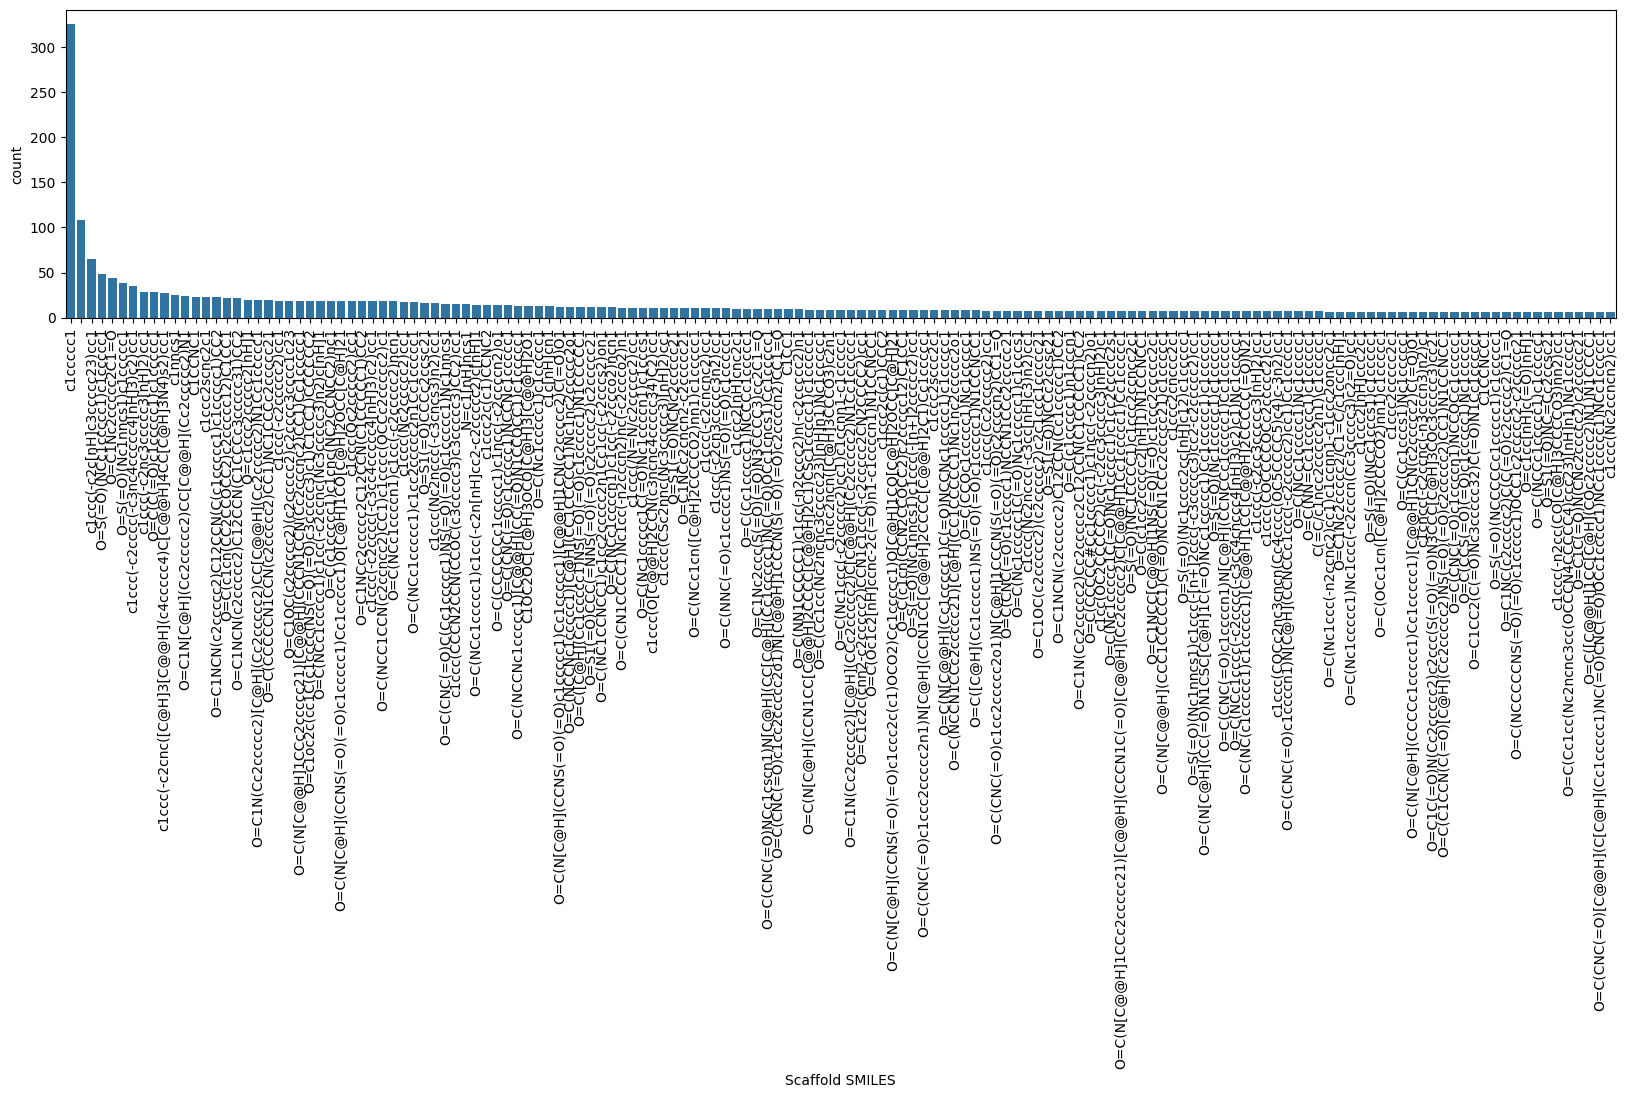

In [40]:
plt.figure(figsize=(20, 4))
sns.countplot(
    chem[chem["Scaffold Count"] > 5].sort_values("Scaffold Count", ascending=False),
    x="Scaffold SMILES",
)
plt.xticks(rotation=90)
plt.show()

In [158]:
scaffolds = pd.unique(
    chem.sort_values("Scaffold Counts", ascending=False)["Scaffold SMILES"]
)
mol = Chem.MolFromSmiles(scaffolds[0])
Draw.MolToImage(mol)

array(['c1ccccc1', '', 'c1ccc(-c2c[nH]c3ccccc23)cc1', ...,
       'O=C1C(=O)N(Cc2ccco2)C(c2ccccc2)C1C(=O)c1cccs1',
       'O=C(N[C@H](CCN(CC1CC1)S(=O)(=O)c1ccccc1)Cc1ccccc1)[C@@H]1CN(c2ccccc2)C(=O)O1',
       'O=C(CCCCCCc1cccs1)c1ncc(-c2ccccn2)o1'], dtype=object)

# Taxonomy

/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_28748/932585417.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sns.countplot(df, x = 'Target Source Organism According to Curator or DataSource', order = pd.value_counts(df['Target Source Organism According to Curator or DataSource']).iloc[:100].index)


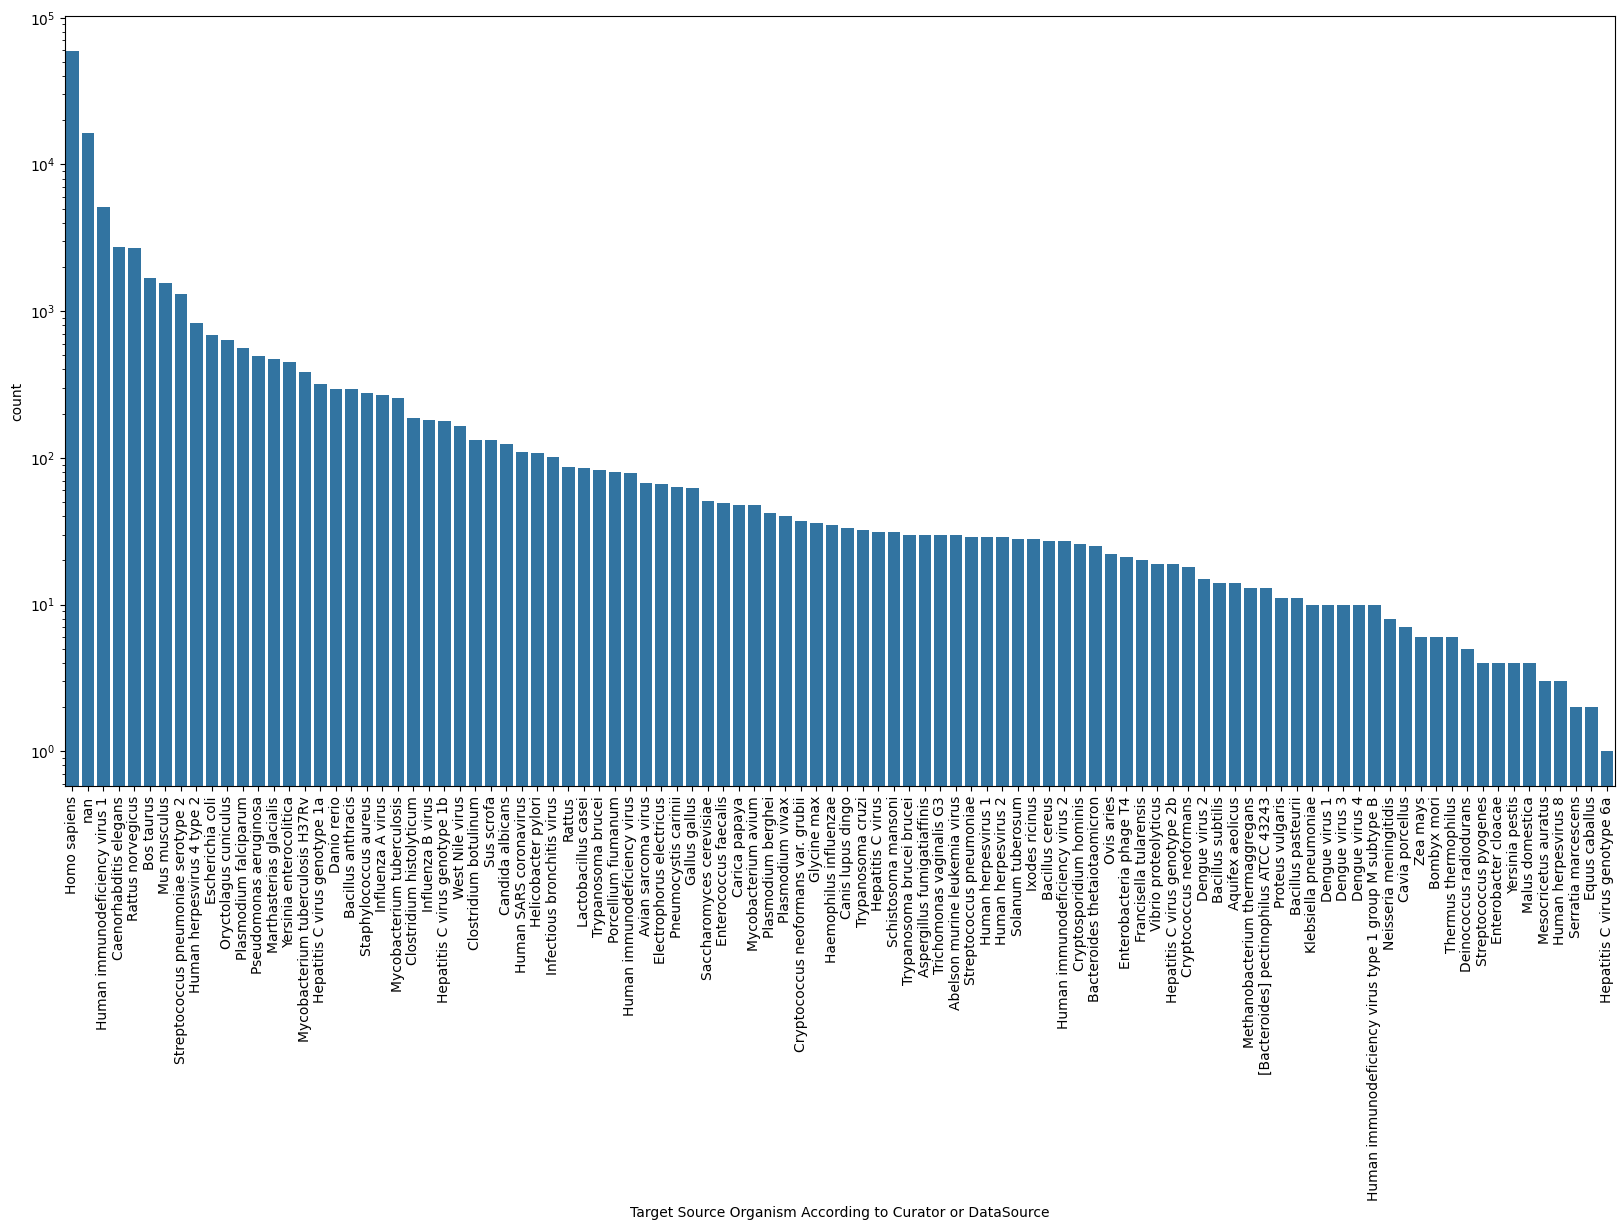

In [51]:
plt.figure(figsize=(20, 10))
f = lambda x: x.split("(")[0].strip()
df["Target Source Organism According to Curator or DataSource"] = (
    df["Target Source Organism According to Curator or DataSource"].astype(str).apply(f)
)
sns.countplot(
    df,
    x="Target Source Organism According to Curator or DataSource",
    order=pd.value_counts(
        df["Target Source Organism According to Curator or DataSource"]
    )
    .iloc[:100]
    .index,
)
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()

In [14]:
ncbi = NCBITaxa()


def get_taxon_id(species_name):
    """
    Get the NCBI taxon ID for a given species name using ete3.

    Parameters:
        species_name (str): The scientific name of the species.

    Returns:
        taxon_id (int): The corresponding taxon ID, or None if not found.
    """
    try:
        # Get taxon ID for the species name
        taxon_id = ncbi.get_name_translator([species_name])

        if species_name in taxon_id:
            return taxon_id[species_name][0]  # Return the taxon ID
        else:
            return None  # Species not found
    except Exception as e:
        print(f"Error fetching taxon ID: {e}")
        return None

In [15]:
chem["Taxon"] = [
    get_taxon_id(species)
    for species in chem["Target Source Organism According to Curator or DataSource"]
]
chem.loc[chem["Taxon"].isna(), "Taxon"] = [
    get_taxon_id(
        species.split("(")[0].strip()
    )  # Split and strip to clean up species name
    for species in chem.loc[
        chem["Taxon"].isna(),
        "Target Source Organism According to Curator or DataSource",
    ]
]
chem.loc[chem["Taxon"].isna(), "Taxon"] = 0
chem["Taxon"] = chem["Taxon"].astype(int)
chem

/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_28748/4096320259.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[None, 2847144, 2847144, 2847144, 2847144, None, 2847144, 2847144, 2847144, 210, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 210, 2847144, None, 2847144, 2847144, 2847144, 2847144, 210, 2847144, 2847144, 2847144, 11320, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, None, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 210, 11320, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 11320, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 11320, 2847144, 210, None, 2847144, 210, 1280, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 2847144, 210, 11320, 2847144, 210, 2847144, 210, 2847144, 2847144, None, None, 284

,BindingDB Reactant_set_id,Ligand SMILES,BindingDB MonomerID,BindingDB Ligand Name,Ki (nM),Target Source Organism According to Curator or DataSource,Taxon
0,19591,CC(C)CC(NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)...,11344,"Hydroxamate 25::N-hydroxy-4-methyl-2-[(1,1,2,2...",36.0,Homo sapiens,9606
1,60890,NS(=O)(=O)c1cc(Cl)c(Cl)c(c1)S(N)(=O)=O,10883,"4,5-dichlorobenzene-1,3-disulfonamide::CHEMBL1...",909.0,Candida albicans,5476
2,16895,OC(=O)C[C@H](NC(=O)C(CCCCNS(=O)(=O)c1ccccc1)c1...,10200,(3S)-3-(6-benzenesulfonamido-2-phenylhexanamid...,5800.0,Homo sapiens,9606
3,27890,CC(=O)OC[C@H]1O[C@@H](OCc2cn(nn2)-c2ccc(cc2)S(...,15224,"4-(4-{[(2,3,4,6-tetra-O-acetyl-beta-D-galactop...",9.7,Homo sapiens,9606
4,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,24,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",0.8,Human immunodeficiency virus 1,11676
...,...,...,...,...,...,...,...
4995,22831,CS(=O)(=O)c1ccccc1-c1ccc(NC(=O)c2cc(nn2-c2ccc3...,12659,1-(3-Aminobenzisoxazol-5-yl)-3-trifluoromethyl...,15000.0,Homo sapiens,9606
4996,33406,Oc1ccc(cc1F)C1(OC(=O)c2c1ccc1ccccc21)c1ccc(O)c...,18761,"1,2-naphthalein derivative, 8::5,5-bis(3-fluor...",132000.0,Homo sapiens,9606
4997,950,CNC(=O)[C@@H](NC(=O)[C@H](OCc1ccc(Br)cc1)[C@H]...,845,"(2R,3R,4R,5R)-2,5-bis[(4-bromophenyl)methoxy]-...",0.3,Human immunodeficiency virus 1,11676
4998,25481,CN[C@H](Cc1ccccc1)C(=O)N1CCC[C@H]1C(=O)NC(CCCN...,14114,"(2S)-N-[5-carbamimidamido-1-(1-methyl-1H-1,3-b...",290.0,Bos taurus,9913


In [349]:
lineages = [ncbi.get_lineage(id) for id in chem["Taxon"]]
dicts = [ncbi.get_rank(lineage) if lineage else [] for lineage in lineages]

In [371]:
taxon_df = pd.concat(
    [
        pd.DataFrame({rank: lin for lin, rank in dict.items()}, index=[0])
        for dict in dicts
    ],
    axis=0,
)

In [380]:
taxon_df[
    [
        "species",
        "genus",
        "family",
        "order",
        "class",
        "phylum",
        "kingdom",
        "superkingdom",
    ]
].replace({})

,species,genus,family,order,class,phylum,kingdom,superkingdom
0,11676.0,11646.0,11632.0,2169561.0,2732514.0,2732409.0,2732397.0,10239.0
0,11676.0,11646.0,11632.0,2169561.0,2732514.0,2732409.0,2732397.0,10239.0
0,9606.0,9605.0,9604.0,9443.0,40674.0,7711.0,33208.0,2759.0
0,9606.0,9605.0,9604.0,9443.0,40674.0,7711.0,33208.0,2759.0
0,562.0,561.0,543.0,91347.0,1236.0,1224.0,NaN,2.0
...,...,...,...,...,...,...,...,...
0,11676.0,11646.0,11632.0,2169561.0,2732514.0,2732409.0,2732397.0,10239.0
0,9606.0,9605.0,9604.0,9443.0,40674.0,7711.0,33208.0,2759.0
0,11676.0,11646.0,11632.0,2169561.0,2732514.0,2732409.0,2732397.0,10239.0
0,9606.0,9605.0,9604.0,9443.0,40674.0,7711.0,33208.0,2759.0


# Sequence

In [12]:
for col in df.columns:
    print(f"'{col}',")

'BindingDB Reactant_set_id',
'Ligand SMILES',
'Ligand InChI',
'Ligand InChI Key',
'BindingDB MonomerID',
'BindingDB Ligand Name',
'Target Name',
'Target Source Organism According to Curator or DataSource',
'Ki (nM)',
'IC50 (nM)',
'Kd (nM)',
'EC50 (nM)',
'kon (M-1-s-1)',
'koff (s-1)',
'pH',
'Temp (C)',
'Curation/DataSource',
'Article DOI',
'BindingDB Entry DOI',
'PMID',
'PubChem AID',
'Patent Number',
'Authors',
'Institution',
'Link to Ligand in BindingDB',
'Link to Target in BindingDB',
'Link to Ligand-Target Pair in BindingDB',
'Ligand HET ID in PDB',
'PDB ID(s) for Ligand-Target Complex',
'PubChem CID',
'PubChem SID',
'ChEBI ID of Ligand',
'ChEMBL ID of Ligand',
'DrugBank ID of Ligand',
'IUPHAR_GRAC ID of Ligand',
'KEGG ID of Ligand',
'ZINC ID of Ligand',
'Number of Protein Chains in Target (>1 implies a multichain complex)',
'BindingDB Target Chain Sequence',
'PDB ID(s) of Target Chain',
'UniProt (SwissProt) Recommended Name of Target Chain',
'UniProt (SwissProt) Entry Name of Targe

In [3]:
seq = df[['Number of Protein Chains in Target (>1 implies a multichain complex)','BindingDB Target Chain Sequence','Target Name',
'PDB ID(s) of Target Chain',
'UniProt (SwissProt) Recommended Name of Target Chain',
'UniProt (TrEMBL) Submitted Name of Target Chain',
'UniProt (SwissProt) Entry Name of Target Chain',
'UniProt (SwissProt) Primary ID of Target Chain',
'UniProt (SwissProt) Secondary ID(s) of Target Chain',
'UniProt (SwissProt) Alternative ID(s) of Target Chain',
'Target Source Organism According to Curator or DataSource']]#.drop_duplicates('BindingDB Target Chain Sequence')
seq

,Number of Protein Chains in Target (>1 implies a multichain complex),BindingDB Target Chain Sequence,Target Name,PDB ID(s) of Target Chain,UniProt (SwissProt) Recommended Name of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (SwissProt) Entry Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,UniProt (SwissProt) Secondary ID(s) of Target Chain,UniProt (SwissProt) Alternative ID(s) of Target Chain,Target Source Organism According to Curator or DataSource
0,1,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,Dimer of Gag-Pol polyprotein [501-599],"1C70,1D4H,1D4I,1D4J,1DIF,1EBW,1EBZ,1EC0,1EC1,1...",Gag-Pol polyprotein,NaN,POL_HV1BR,P03367,NaN,NaN,Human immunodeficiency virus 1
1,1,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,Dimer of Gag-Pol polyprotein [501-599],"1C70,1D4H,1D4I,1D4J,1DIF,1EBW,1EBZ,1EC0,1EC1,1...",Gag-Pol polyprotein,NaN,POL_HV1BR,P03367,NaN,NaN,Human immunodeficiency virus 1
2,1,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,Dimer of Gag-Pol polyprotein [501-599],"1C70,1D4H,1D4I,1D4J,1DIF,1EBW,1EBZ,1EC0,1EC1,1...",Gag-Pol polyprotein,NaN,POL_HV1BR,P03367,NaN,NaN,Human immunodeficiency virus 1
3,1,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,Dimer of Gag-Pol polyprotein [501-599],"1C70,1D4H,1D4I,1D4J,1DIF,1EBW,1EBZ,1EC0,1EC1,1...",Gag-Pol polyprotein,NaN,POL_HV1BR,P03367,NaN,NaN,Human immunodeficiency virus 1
4,1,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,Dimer of Gag-Pol polyprotein [501-599],"1C70,1D4H,1D4I,1D4J,1DIF,1EBW,1EBZ,1EC0,1EC1,1...",Gag-Pol polyprotein,NaN,POL_HV1BR,P03367,NaN,NaN,Human immunodeficiency virus 1
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,MADNDFLSGEAIMVFKKEILDSHSDFTRSLSHQSASPEAYDQENVF...,POsterior Segregation,6NZL,NaN,RNA-binding protein pos-1,NaN,NaN,NaN,NaN,Caenorhabditis elegans
99996,1,MADNDFLSGEAIMVFKKEILDSHSDFTRSLSHQSASPEAYDQENVF...,POsterior Segregation,6NZL,NaN,RNA-binding protein pos-1,NaN,NaN,NaN,NaN,Caenorhabditis elegans
99997,1,MADNDFLSGEAIMVFKKEILDSHSDFTRSLSHQSASPEAYDQENVF...,POsterior Segregation,6NZL,NaN,RNA-binding protein pos-1,NaN,NaN,NaN,NaN,Caenorhabditis elegans
99998,1,MADNDFLSGEAIMVFKKEILDSHSDFTRSLSHQSASPEAYDQENVF...,POsterior Segregation,6NZL,NaN,RNA-binding protein pos-1,NaN,NaN,NaN,NaN,Caenorhabditis elegans


In [4]:
pd.unique(seq['BindingDB Target Chain Sequence']).shape

(1333,)

In [5]:
f = lambda x:len(x.drop_duplicates('Target Name'))
pd.DataFrame(df.groupby('Ligand SMILES').apply(len, include_groups=False)).rename(columns={0: 'num'})

,num
Ligand SMILES,
Br.CN1CCc2cc3OCOc3c3-c4ccccc4[C@@H](O)[C@@H]1c23,3
BrC(C=NNC(=O)c1[nH]nc2CCCc12)=Cc1ccccc1,2
BrC(C=Nn1c(n[nH]c1=S)-c1cc([nH]n1)-c1ccccc1)=Cc1ccccc1,1
BrC(c1ccccc1)(c1ccccc1)c1ccccc1,1
BrC1=Cc2cccc3cccc(C1=O)c23,1
...,...
c1nnc2c3ccccc3nc(-c3ccccc3)n12,1
c1nncn1C1(c2ccccc2-c2ccccc12)c1ccccc1,2
c1nnnn1-c1cccnc1,1


In [55]:
def get_name(df):
    return df['UniProt (SwissProt) Recommended Name of Target Chain'].fillna(df['UniProt (TrEMBL) Submitted Name of Target Chain'])

def get_id(df):
    return df['UniProt (SwissProt) Primary ID of Target Chain'].fillna(df['UniProt (TrEMBL) Primary ID of Target Chain'])

def to_fasta(df, filepath):    
    with open(filepath, 'w') as file:
        for name, id, seq in zip(get_name(df), get_id(df), df['BindingDB Target Chain Sequence']):
            file.write(f">{id}|{name}\n{seq}\n")

In [56]:
seq_df = pd.read_csv(
    "/Users/guillaumebelissent/Docs/EPFL/MA/ADA/BindingDB_All.tsv",
    sep="\t",
    usecols=['UniProt (SwissProt) Primary ID of Target Chain', 'UniProt (TrEMBL) Submitted Name of Target Chain','UniProt (SwissProt) Recommended Name of Target Chain','UniProt (TrEMBL) Primary ID of Target Chain','BindingDB Target Chain Sequence'],
).drop_duplicates()
print(seq_df.shape)
to_fasta(seq_df, filepath='BindingDB.fasta')

/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_37395/3404480025.py:1: DtypeWarning: Columns (45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  seq_df = pd.read_csv(


(8889, 5)


In [10]:
df['DrugBank ID of Ligand'].value_counts()

DrugBank ID of Ligand
DB01268    218
DB01254    121
DB08764    111
DB00398    102
DB05424     89
          ... 
DB07410      1
DB07873      1
DB07404      1
DB08529      1
DB01392      1
Name: count, Length: 917, dtype: int64

In [ ]:
import requests
import tqdm
from tqdm.notebook import tqdm_notebook


diseases = [
    [
        comment.get("disease", {}).get("diseaseId")
        for comment in requests.get(f"https://www.uniprot.org/uniprotkb/{id}.json")
        .json()
        .get("comments", [])
        if comment["commentType"] == "DISEASE"
        if comment.get("disease") is not None
    ]
    for id in tqdm_notebook(df_counts.index)
]

In [18]:
drugbank = pd.read_xml('../data/fulldatabase.xml')

In [21]:
drugbank_id = pd.read_csv(
    "/Users/guillaumebelissent/Docs/EPFL/MA/ADA/BindingDB_All.tsv",
    sep="\t",
    usecols=['DrugBank ID of Ligand'],
)

/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_37395/865663306.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  drugbank_id = pd.read_csv(


In [23]:
drugbank_id.value_counts()

DrugBank ID of Ligand
DB00819                  2344
DB02546                  1736
DB01268                  1692
DB00398                  1660
DB05465                  1209
                         ... 
DB07291                     1
DB08143                     1
DB08140                     1
DB08139                     1
DB08353                     1
Name: count, Length: 2616, dtype: int64

In [20]:
df['DrugBank ID of Ligand'].value_counts()

DrugBank ID of Ligand
DB01268    218
DB01254    121
DB08764    111
DB00398    102
DB05424     89
          ... 
DB07410      1
DB07873      1
DB07404      1
DB08529      1
DB01392      1
Name: count, Length: 917, dtype: int64

In [24]:
drugbank

,type,created,updated,drugbank-id,name,description,cas-number,unii,state,groups,...,snp-adverse-drug-reactions,targets,enzymes,carriers,transporters,fda-label,msds,average-mass,monoisotopic-mass,calculated-properties
0,biotech,2005-06-13,2024-01-02,BIOD00024,Lepirudin,Lepirudin is a recombinant hirudin formed by 6...,138068-37-8,Y43GF64R34,solid,\n,...,None,\n,None,None,None,None,None,NaN,NaN,None
1,biotech,2005-06-13,2024-01-02,BIOD00071,Cetuximab,Cetuximab is a recombinant chimeric human/mous...,205923-56-4,PQX0D8J21J,liquid,\n,...,None,\n,None,None,None,//s3-us-west-2.amazonaws.com/drugbank/fda_labe...,//s3-us-west-2.amazonaws.com/drugbank/msds/DB0...,NaN,NaN,None
2,biotech,2005-06-13,2024-03-13,BIOD00001,Dornase alfa,Dornase alfa is a biosynthetic form of human d...,143831-71-4,953A26OA1Y,liquid,\n,...,None,\n,None,None,None,//s3-us-west-2.amazonaws.com/drugbank/fda_labe...,//s3-us-west-2.amazonaws.com/drugbank/msds/DB0...,NaN,NaN,None
3,biotech,2005-06-13,2024-01-02,BIOD00084,Denileukin diftitox,A recombinant DNA-derived cytotoxic protein co...,173146-27-5,25E79B5CTM,liquid,\n,...,None,\n,None,None,None,//s3-us-west-2.amazonaws.com/drugbank/fda_labe...,None,NaN,NaN,None
4,biotech,2005-06-13,2024-02-02,BIOD00052,Etanercept,Dimeric fusion protein consisting of the extra...,185243-69-0,OP401G7OJC,liquid,\n,...,None,\n,None,None,None,None,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16576,biotech,2024-01-10,2024-01-13,DB18713,Recombinant stabilized RSV A prefusion F antigen,Recombinant stabilized RSV B prefusion F antig...,None,None,solid,\n,...,None,None,None,None,None,None,None,NaN,NaN,None
16577,biotech,2024-01-10,2024-01-13,DB18714,Recombinant stabilized RSV B prefusion F antigen,Recombinant stabilized RSV B prefusion F antig...,None,None,solid,\n,...,None,None,None,None,None,None,None,NaN,NaN,None
16578,small molecule,2024-01-18,2024-01-19,DB18715,Tolebrutinib,None,1971920-73-6,8CZ82ZYY9X,None,\n,...,None,None,None,None,None,None,None,455.518,455.195740,\n
16579,small molecule,2024-02-26,2024-02-28,DB18716,Enmetazobactam,Enmetazobactam is a penicillanic acid sulfone ...,1001404-83-6,80VUN7L00C,solid,\n,...,None,\n,\n,None,None,None,None,314.320,314.068491,\n


In [33]:
drugbank.merge(drugbank_id, right_on='DrugBank ID of Ligand', left_on='drugbank-id', how = 'inner')

,type,created,updated,drugbank-id,name,description,cas-number,unii,state,groups,...,targets,enzymes,carriers,transporters,fda-label,msds,average-mass,monoisotopic-mass,calculated-properties,DrugBank ID of Ligand
0,small molecule,2005-06-13,2024-03-13,DB00715,Paroxetine,Paroxetine is a selective serotonin reuptake i...,61869-08-7,41VRH5220H,solid,\n,...,\n,\n,None,\n,None,//s3-us-west-2.amazonaws.com/drugbank/msds/DB0...,329.3654,329.142722,\n,DB00715
1,small molecule,2005-06-13,2024-03-13,DB00715,Paroxetine,Paroxetine is a selective serotonin reuptake i...,61869-08-7,41VRH5220H,solid,\n,...,\n,\n,None,\n,None,//s3-us-west-2.amazonaws.com/drugbank/msds/DB0...,329.3654,329.142722,\n,DB00715
2,small molecule,2005-06-13,2024-03-13,DB00715,Paroxetine,Paroxetine is a selective serotonin reuptake i...,61869-08-7,41VRH5220H,solid,\n,...,\n,\n,None,\n,None,//s3-us-west-2.amazonaws.com/drugbank/msds/DB0...,329.3654,329.142722,\n,DB00715
3,small molecule,2005-06-13,2024-03-13,DB00715,Paroxetine,Paroxetine is a selective serotonin reuptake i...,61869-08-7,41VRH5220H,solid,\n,...,\n,\n,None,\n,None,//s3-us-west-2.amazonaws.com/drugbank/msds/DB0...,329.3654,329.142722,\n,DB00715
4,small molecule,2005-06-13,2024-03-13,DB00715,Paroxetine,Paroxetine is a selective serotonin reuptake i...,61869-08-7,41VRH5220H,solid,\n,...,\n,\n,None,\n,None,//s3-us-west-2.amazonaws.com/drugbank/msds/DB0...,329.3654,329.142722,\n,DB00715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26522,small molecule,2007-07-06,2021-02-21,DB01361,Troleandomycin,A macrolide antibiotic that is similar to eryt...,2751-09-9,C4DZ64560D,solid,\n,...,\n,\n,None,\n,None,//s3-us-west-2.amazonaws.com/drugbank/msds/DB1...,813.9684,813.451070,\n,DB01361
26523,small molecule,2007-07-06,2021-02-21,DB01361,Troleandomycin,A macrolide antibiotic that is similar to eryt...,2751-09-9,C4DZ64560D,solid,\n,...,\n,\n,None,\n,None,//s3-us-west-2.amazonaws.com/drugbank/msds/DB1...,813.9684,813.451070,\n,DB01361
26524,small molecule,2007-07-06,2021-02-21,DB01361,Troleandomycin,A macrolide antibiotic that is similar to eryt...,2751-09-9,C4DZ64560D,solid,\n,...,\n,\n,None,\n,None,//s3-us-west-2.amazonaws.com/drugbank/msds/DB1...,813.9684,813.451070,\n,DB01361
26525,small molecule,2007-07-06,2021-02-21,DB01361,Troleandomycin,A macrolide antibiotic that is similar to eryt...,2751-09-9,C4DZ64560D,solid,\n,...,\n,\n,None,\n,None,//s3-us-west-2.amazonaws.com/drugbank/msds/DB1...,813.9684,813.451070,\n,DB01361


In [32]:
pd.merge(drugbank_id, drugbank, left_on='DrugBank ID of Ligand', right_on='drugbank-id', how = 'inner')

,DrugBank ID of Ligand,type,created,updated,drugbank-id,name,description,cas-number,unii,state,...,snp-adverse-drug-reactions,targets,enzymes,carriers,transporters,fda-label,msds,average-mass,monoisotopic-mass,calculated-properties
0,DB06910,small molecule,2010-09-15,2020-06-12,DB06910,"[4-R-(4-ALPHA,6-BETA,7-BETA]-HEXAHYDRO-5,6-DI(...",None,None,None,solid,...,None,\n,None,None,None,None,None,406.5173,406.225643,\n
1,DB06910,small molecule,2010-09-15,2020-06-12,DB06910,"[4-R-(4-ALPHA,6-BETA,7-BETA]-HEXAHYDRO-5,6-DI(...",None,None,None,solid,...,None,\n,None,None,None,None,None,406.5173,406.225643,\n
2,DB07472,small molecule,2010-09-15,2020-06-12,DB07472,"(R)-(+)9B-(3-METHYL)PHENYL-2,3-DIHYDROTHIAZOLO...",None,None,None,solid,...,None,\n,None,None,None,None,None,281.3720,281.087435,\n
3,DB08665,small molecule,2010-09-15,2020-06-12,DB08665,"6,11-DIHYDRO-11-ETHYL-6-METHYL-9-NITRO-5H-PYRI...",None,None,KOO1113T0V,solid,...,None,\n,None,None,None,None,None,298.2967,298.106590,\n
4,DB08528,small molecule,2010-09-15,2020-06-12,DB08528,"2-AMINO-6-(3,5-DIMETHYLPHENYL)SULFONYLBENZONIT...",None,None,None,solid,...,None,\n,None,None,None,None,None,286.3490,286.077598,\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26522,DB01254,small molecule,2007-05-09,2024-03-13,DB01254,Dasatinib,Dasatinib is an orally available multikinase i...,302962-49-8,X78UG0A0RN,solid,...,None,\n,\n,None,\n,None,None,488.0060,487.155722,\n
26523,DB09330,small molecule,2015-11-18,2024-03-13,DB09330,Osimertinib,"Osimertinib is an oral, third-generation epide...",1421373-65-0,3C06JJ0Z2O,solid,...,None,\n,\n,None,\n,None,None,499.6190,499.269573,\n
26524,DB01254,small molecule,2007-05-09,2024-03-13,DB01254,Dasatinib,Dasatinib is an orally available multikinase i...,302962-49-8,X78UG0A0RN,solid,...,None,\n,\n,None,\n,None,None,488.0060,487.155722,\n
26525,DB06616,small molecule,2008-03-19,2023-11-24,DB06616,Bosutinib,Bosutinib is a 7-alkoxy-3-quinolinecarbonitril...,380843-75-4,5018V4AEZ0,solid,...,None,\n,\n,None,\n,//s3-us-west-2.amazonaws.com/drugbank/fda_labe...,//s3-us-west-2.amazonaws.com/drugbank/msds/DB0...,530.4460,529.164745,\n


In [30]:
drugbank_id.dropna().shape

(87462, 1)

In [34]:
list(drugbank.columns)

['type',
 'created',
 'updated',
 'drugbank-id',
 'name',
 'description',
 'cas-number',
 'unii',
 'state',
 'groups',
 'general-references',
 'synthesis-reference',
 'indication',
 'pharmacodynamics',
 'mechanism-of-action',
 'toxicity',
 'metabolism',
 'absorption',
 'half-life',
 'protein-binding',
 'route-of-elimination',
 'volume-of-distribution',
 'clearance',
 'classification',
 'salts',
 'synonyms',
 'products',
 'international-brands',
 'mixtures',
 'packagers',
 'manufacturers',
 'prices',
 'categories',
 'affected-organisms',
 'dosages',
 'atc-codes',
 'ahfs-codes',
 'pdb-entries',
 'patents',
 'food-interactions',
 'drug-interactions',
 'sequences',
 'experimental-properties',
 'external-identifiers',
 'external-links',
 'pathways',
 'reactions',
 'snp-effects',
 'snp-adverse-drug-reactions',
 'targets',
 'enzymes',
 'carriers',
 'transporters',
 'fda-label',
 'msds',
 'average-mass',
 'monoisotopic-mass',
 'calculated-properties']

In [51]:
drugbank['food-interactions'].value_counts()

food-interactions
\n        1404
Name: count, dtype: int64

In [39]:
drugbank['mechanism-of-action'][0]

'Lepirudin is a direct thrombin inhibitor used as an anticoagulant in patients for whom heparin is contraindicated.[L41539,A3] Thrombin is a serine protease that participates in the blood-clotting cascade, and it is formed by the cleavage of pro-thrombin. Active thrombin cleaves fibrinogen and generates fibrin monomers that polymerize to form fibrin clots.[A246624]\r\n\r\nLepirudin binds to the catalytic and substrate-binding sites of thrombin, forming a stable, irreversible and non-covalent complex.[A246609] This blocks the protease activity of thrombin and inhibits the coagulation process. Each molecule of lepirudin binds to a single molecule of thrombin,[L41539] and unlike [heparin], it is able to inhibit thrombin in both its clot-bound or free states.[A246609]'